In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import datetime
import matplotlib.pyplot as plt
import math
from scipy.integrate import quad

# 1.)

In [4]:
# calc merton survival probability with GBM distributed Assets 

def calc_surv_p(B):
    
    Vt = 18000000
    r = 0.025
    sigma = 0.35
    mu = 0.02
    t = 0
    T = 6.0
    
    num = np.log(B / Vt) - (r - sigma**2 / 2) * (T - t)
    denom = sigma * np.sqrt(T - t)
    
    prob = 1 - norm.cdf(num / denom)
    
    return prob 

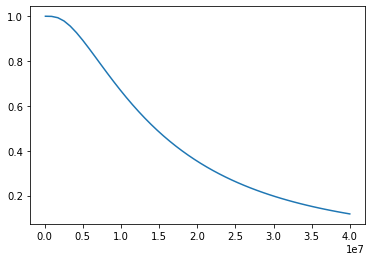

In [15]:
B = np.linspace(100000,40000000)
plt.plot(B,calc_surv_p(B))

In [23]:
def equity(B):
    
    Vt = 18000000
    r = 0.025
    sigma = 0.35
    mu = 0.02
    t = 0
    T = 6.0
    
    d1  =  (np.log(Vt/B)  +  (r  +  sigma**2/2)*T)  /  (sigma*np.sqrt(T))
    d2  =  (np.log(Vt/B)  +  (r  -  sigma**2/2)*T)  /  (sigma*np.sqrt(T))
    
    St = norm.cdf(d1) * Vt - norm.cdf(d2) * B * np.exp(- r * (T - t))
    
    return St

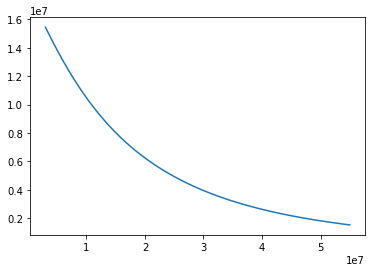

In [26]:
B = np.array(range(3000000, 55000000, 10000))
plt.plot(B,equity(B))

In [30]:
def zero_coupon(B):
    r = 0.025
    t = 0
    T = 6.0
    value = B * np.exp(- r * (T - t))
    return value

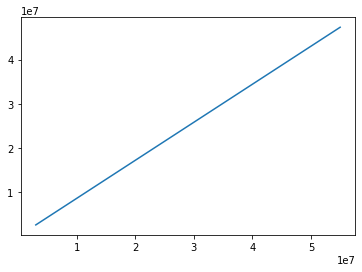

In [31]:
B = np.array(range(3000000, 55000000, 10000))
plt.plot(B,zero_coupon(B))

In [27]:
Vt = 18000000
r = 0.025
sigma = 0.35
mu = 0.02
t = 0
T = 6.0
B = np.exp(norm.ppf(1-0.956)*sigma*np.sqrt(T) + (r - (sigma**2)/2)*T)*Vt
B

3354303.7654017713

# 2.)

a.)
The difference in value between a credit-risk-free portfolio and an identical portfolio that takes into account a potential change in creditworthiness. This difference in value is termed the credit valuation adjustment (CVA).


b.) in pdf

c.) The risk that occurs when exposure to a counterparty is adversely correlated with the credit quality of that counterparty. In short it arises when default risk and credit exposure increase together.

d.) A bank would be exposed to general wrong-way risk if a rise in interest rates increased both its exposure to a counterparty and the risk of the counterparty's default.

# 3.)

in pdf

# 4.)

In [3]:
####question 3
###question 2
import datetime as dt
from dateutil.relativedelta import relativedelta
BA = pd.read_csv('BA-bloomberg.csv')
NOC = pd.read_csv('NOC-bloomberg.csv')
sampl_size_ba = len(BA)
sampl_size_noc = len(NOC)

BA['Dates'] = [dt.datetime.strptime(d, '%m/%d/%Y').date() for d in BA["Dates"]]
BA['BA_log_return_daily_short'] = (-1)*(np.log(BA['PX_LAST'])-np.log(BA['PX_LAST'].shift(-1)))
BA['BA_log_return_daily_long'] = np.log(BA['PX_LAST'])-np.log(BA['PX_LAST'].shift(-1))

NOC['Dates'] = [dt.datetime.strptime(d, '%m/%d/%Y').date() for d in NOC["Dates"]]
NOC['NOC_log_return_daily_short'] = (-1)*(np.log(NOC['PX_LAST'])-np.log(NOC['PX_LAST'].shift(-1)))
NOC['NOC_log_return_daily_long'] = np.log(NOC['PX_LAST'])-np.log(NOC['PX_LAST'].shift(-1))

total = pd.merge(BA, NOC, on='Dates', how='inner',suffixes=('_BA', '_NOC'))
total['portfolio'] = 134*total['PX_LAST_BA'] + 166*total['PX_LAST_NOC']
total['portfolio_log_return_daily_short'] = (-1)*(np.log(total['portfolio']) - np.log(total['portfolio'].shift(-1)))
total['portfolio_log_return_daily_long'] = (np.log(total['portfolio']) - np.log(total['portfolio'].shift(-1)))

In [4]:
total

,Dates,PX_OPEN_BA,PX_HIGH_BA,PX_LOW_BA,PX_CLOSE_1D_BA,PX_VOLUME_BA,PX_LAST_BA,BA_log_return_daily_short,BA_log_return_daily_long,PX_OPEN_NOC,PX_HIGH_NOC,PX_LOW_NOC,PX_CLOSE_1D_NOC,PX_VOLUME_NOC,PX_LAST_NOC,NOC_log_return_daily_short,NOC_log_return_daily_long,portfolio,portfolio_log_return_daily_short,portfolio_log_return_daily_long
0,2022-09-22,143.130,143.700,138.290,143.290,6311829,138.710,0.032485,-0.032485,492.770,500.630,482.260,492.870,1206775,496.460,-0.007257,0.007257,100999.500,0.000176,-0.000176
1,2022-09-21,146.770,149.870,143.210,145.940,6244253,143.290,0.018325,-0.018325,505.490,515.490,492.610,494.000,1246802,492.870,0.002290,-0.002290,101017.280,0.005358,-0.005358
2,2022-09-20,145.260,147.670,143.900,144.880,6737550,145.940,-0.007290,0.007290,488.060,496.080,481.030,488.070,875761,494.000,-0.012077,0.012077,101559.960,-0.011153,0.011153
3,2022-09-19,142.620,146.990,142.350,144.290,5150720,144.880,-0.004081,0.004081,483.190,492.570,481.050,485.200,843016,488.070,-0.005898,0.005898,100433.540,-0.005546,0.005546
4,2022-09-16,145.230,145.630,141.350,149.780,10310726,144.290,0.037342,-0.037342,483.360,487.849,480.300,485.080,1115534,485.200,-0.000247,0.000247,99878.060,0.007141,-0.007141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9317,1985-10-04,10.306,10.361,10.028,10.333,1174050,10.028,0.029961,-0.029961,21.262,21.262,20.978,21.205,154600,20.978,0.010763,-0.010763,4826.100,0.016145,-0.016145
9318,1985-10-03,10.389,10.528,10.333,10.389,1144350,10.333,0.005405,-0.005405,21.489,21.489,21.149,21.375,179800,21.205,0.007985,-0.007985,4904.652,0.007257,-0.007257
9319,1985-10-02,10.417,10.500,10.333,10.361,1500750,10.389,-0.002699,0.002699,21.942,21.942,21.319,21.716,107600,21.375,0.015827,-0.015827,4940.376,0.010642,-0.010642
9320,1985-10-01,10.056,10.389,10.028,10.083,1326150,10.361,-0.027198,0.027198,21.262,21.716,21.149,21.262,139000,21.716,-0.021128,0.021128,4993.230,-0.022812,0.022812


In [191]:
def plot_last_l_years (s,l):
    Today = s.iloc[0,].Dates
    year = Today.year
    last = year - 24
    last_day = str(last)+str(Today)[4:10]
    last_day  = dt.datetime.strptime(last_day,'%Y-%m-%d').date()
    trunc_data_t = s[(s['Dates']> last_day) & (s['Dates']<= Today )].Dates
    return trunc_data_t

In [192]:
def mu_portfolio(s,t,l,col):
    
    Today = t
    start_date = (Today + relativedelta(years=-1*l))
    trunc_data = s[(s['Dates']> start_date) & (s['Dates']<= t )]
    length = len(trunc_data)
    
    log_mean = trunc_data[col].mean()
    
    sd_log = np.sqrt(1/length*sum(trunc_data[col]**2)-log_mean**2)
    
    sigma_GBM = sd_log/np.sqrt(1/252)
    mu_GBM = log_mean * 252 + sigma_GBM**2/2
    variance = sigma_GBM**2
    
    return mu_GBM,variance

# -> change for long or short portfolio

In [193]:
####5year window for Portfolio
from statistics import variance
mean_list_portfolio_5 = list()
variance_list_portfolio_5 = list()

col = 'portfolio_log_return_daily_short'
# or 'portfolio_log_return_daily_long'

for i in plot_last_l_years(total,5):
    mean,variance = mu_portfolio(total,i,5, col)
    mean_list_portfolio_5.append(mean)
    variance_list_portfolio_5.append(variance)

In [194]:
sigma_list_portfolio_5 = [variance_list_portfolio_5[i]**(1/2) for i in range(len(variance_list_portfolio_5))]

In [195]:
mean_list_portfolio_5 = mean_list_portfolio_5[::-1]
sigma_list_portfolio_5 = sigma_list_portfolio_5[::-1]

In [196]:
def port_gbm(s0, mu, sigma, T, W_T):
    
    gbm_ar = []
    # calc array for gbms for all W_T
    for i in range(len(W_T)):
        
        gbm = s0 * np.exp((mu - sigma**2 / 2) * T + sigma * W_T[i])
        gbm_ar.append(gbm)
        
    return gbm_ar

In [197]:
# var for gbm stock 
def VaR_gbm(s0, mu, sigma, t, p):
    
    icdf = norm.ppf(1-p)
    v1 = sigma*(t**0.5)*icdf + (mu - (sigma**2)/2)*t
    v = s0 - s0 * np.exp(v1)
    
    return v

In [198]:
def ES_gbm(s0, mu, sigma, T, p):
    
    X = calc_X(s0, mu, sigma, T, p)
    
    d1 = calc_d1(s0, mu, sigma, T, X)
    
    ES = s0 - (1 / (1 - p)) * np.exp(mu * T) * s0 * (1 - norm.cdf(d1))
    
    return ES

In [199]:
def calc_X(s0_x, mu_x, sigma_x, T_x, p_x):
    
    v_x = s0_x - VaR_gbm(s0_x, mu_x, sigma_x, T_x, p_x)
    
    return v_x

In [200]:
def calc_d1(s0, mu, sigma, T, X):
    
    d1 = 1 / (sigma * np.sqrt(T)) * (np.log(s0 / X) + (mu + (sigma**2)/2)*T)
    
    return d1

# This will also be used to calculate portfolio 0.975 ES for 5.)

In [201]:
VaR_list = []
ES_list = []

VaRgbm_list = []
ESgbm_list = []

s0 = 10000
T = 5/252

n = len(mean_list_portfolio_5)

for i in range(n):
    
    s0 = total['portfolio'].iloc[i]
    
    ##### Monte Carlo
    W_T = np.random.normal(0, np.sqrt(T), 10000)
    gbm_simu = port_gbm(s0, mean_list_portfolio_5[i], sigma_list_portfolio_5[i], T, W_T)
    gbm_simu = np.array(gbm_simu)
    VaR_star = s0 - np.quantile(gbm_simu, 1 - 0.99)
    ES_star = s0 - (gbm_simu[gbm_simu <= np.quantile(gbm_simu, 1 - 0.975)]).mean()
    VaR_star_new = (VaR_star / s0) * 10000
    ES_star_new = (ES_star / s0) * 10000
    
    ##### GBM VaR
    VaRgbm_star = VaR_gbm(s0, mean_list_portfolio_5[i], sigma_list_portfolio_5[i], T, 0.99)
    ESgbm_star = ES_gbm(s0, mean_list_portfolio_5[i], sigma_list_portfolio_5[i], T, 0.975)
    VaRgbm_star_new = (VaRgbm_star / s0) * 10000
    ESgbm_star_new = (ESgbm_star / s0) * 10000
    
    
    VaR_list.append(VaR_star_new)
    ES_list.append(ES_star_new)
    
    VaRgbm_list.append(VaRgbm_star_new)
    ESgbm_list.append(ESgbm_star_new)

# VaR for gbm long portfolio in blue and gbm short portfolio in orange

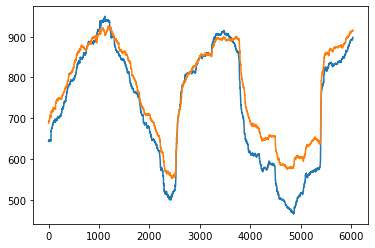

In [116]:
plt.plot(VaR_gbm_long)
plt.plot(VaR_gbm_short)

# short portfolio has in certain parts higher VaR than VaR calculated for long portfolio.

# Monte Carlo Var directly with BA and NOC for short portfolio

In [171]:
def mu_BA(s,t,l):
    
    Today = t
    start_date = (Today + relativedelta(years=-1*l))
    trunc_data = s[(s['Dates']> start_date) & (s['Dates']<= t )]
    length = len(trunc_data)
    #arithmatic = trunc_data.BA_daily_return_short.mean()
    log_mean = trunc_data.BA_log_return_daily_short.mean()
    #sd_arith = np.sqrt(1/length*sum(trunc_data.BA_daily_return**2)-arithmatic**2)
    sd_log = np.sqrt(1/length*sum(trunc_data.BA_log_return_daily_short**2)-log_mean**2)
    sigma_GBM = sd_log/np.sqrt(1/252)
    mu_GBM = log_mean*252+sigma_GBM**2/2
    return mu_GBM,sigma_GBM


def mu_NOC(s,t,l):
    
    Today = t
    start_date = (Today + relativedelta(years=-1*l))
    trunc_data = s[(s['Dates']> start_date) & (s['Dates']<= t )]
    length = len(trunc_data)
    #arithmatic = trunc_data.NOC_daily_return.mean()
    log_mean = trunc_data.NOC_log_return_daily_short.mean()
    #sd_arith = np.sqrt(1/length*sum(trunc_data.NOC_daily_return**2)-arithmatic**2)
    sd_log = np.sqrt(1/length*sum(trunc_data.NOC_log_return_daily_short**2)-log_mean**2)
    sigma_GBM = sd_log/np.sqrt(1/252)
    mu_GBM = log_mean*252+sigma_GBM**2/2
    return mu_GBM,sigma_GBM

In [172]:
mu_list_BA_5 = list()
sigma_list_BA_5 = list()
for i in plot_last_l_years (BA,5):

    log_mean,sd_log = mu_BA(BA,i,5)
    mu_list_BA_5.append(log_mean)
    sigma_list_BA_5.append(sd_log)

    
mu_list_5_noc = list()
sigma_list_5_noc = list()
for i in plot_last_l_years (NOC,5):

    log_mean,sd_log = mu_NOC(NOC,i,5)
    mu_list_5_noc.append(log_mean)
    sigma_list_5_noc.append(sd_log)

In [173]:
def covariance(s,t,l):
    Today = t
    start_date = (Today + relativedelta(years=-1*l))
    trunc_data = s[(s['Dates']> start_date) & (s['Dates']<= t )]
    length = len(trunc_data)
    cov = trunc_data['NOC_log_return_daily_short'].cov(trunc_data['BA_log_return_daily_short'])
    
    return cov

In [174]:
cov_list = list()
for i in plot_last_l_years (total,5):
    cov= covariance(total,i,5)
    cov_list.append(cov)

In [175]:
cor_list = [cov_list[i]*252/(sigma_list_portfolio_5_ba[i]*sigma_list_portfolio_5_noc[i]) for i in range(len(cov_list))]

In [176]:
def update_s0_ba(s,t,l):
    
    Today = t
    start_date = (Today + relativedelta(years=-1*l))
    trunc_data = s[(s['Dates']> start_date) & (s['Dates']<= t )]
    value  = (list(trunc_data.PX_LAST_BA))[0]
    return value

def update_s0_noc(s,t,l):
    
    Today = t
    start_date = (Today + relativedelta(years=-1*l))
    trunc_data = s[(s['Dates']> start_date) & (s['Dates']<= t )]
    value  = (list(trunc_data.PX_LAST_NOC))[0]
    return value

In [177]:
s_5_ba = list()
s_5_noc =list()
for i in plot_last_l_years (total,5):

    s0_ba= update_s0_ba(total,i,5)
    s_5_ba.append(s0_ba)
    s0_noc= update_s0_noc(total,i,5)
    s_5_noc.append(s0_noc)

In [178]:
def VaR_ES(s_ba,s_noc,mu_ba,sigma_ba,mu_noc,sigma_noc,cor,t,p1,p2):
    cov = cor*t
    cov_matrix = [[t,cov],[cov,t]]
    s0 = 134*s_ba+166*s_noc
    w_ba,w_noc = np.random.multivariate_normal([0,0], cov_matrix, size=100000).T
    v = 134*s_ba*np.exp((mu_ba-sigma_ba**2/2)*t +sigma_ba*w_ba) +166*s_noc*np.exp((mu_noc-sigma_noc**2/2)*t +sigma_noc*w_noc)
    Var =s0 - np.quantile(v,1-p1)
    Es =  s0 -v[v<=np.quantile(v,1-p2)].mean()
    Var = Var/s0*10000
    Es = Es/s0*10000
    return Var, Es

In [179]:
#####portfolio
VaR_list_portfolio_5_99=[VaR_ES (s_5_ba[i],s_5_noc[i],mu_list_BA_5[i],sigma_list_BA_5[i],mu_list_5_noc[i],sigma_list_5_noc[i],cor_list[i],5/252,0.99,0.975)[0] for i in range(len(sigma_list_portfolio_5))]
ES_list_portfolio_5_75=[VaR_ES (s_5_ba[i],s_5_noc[i],mu_list_BA_5[i],sigma_list_BA_5[i],mu_list_5_noc[i],sigma_list_5_noc[i],cor_list[i],5/252,0.99,0.975)[1] for i in range(len(sigma_list_portfolio_5))]


In [180]:
data_seperate = {'Time':plot_last_l_years (total,5), 'VaR_portfolio_5years_0.99':VaR_list_portfolio_5_99, 'Es_portfolio_5years_0.975':ES_list_portfolio_5_75}
pd.DataFrame(data_seperate)

,Time,VaR_portfolio_5years_0.99,Es_portfolio_5years_0.975
0,2022-09-22,786.174334,787.498330
1,2022-09-21,780.313896,785.055499
2,2022-09-20,781.810723,784.929140
3,2022-09-19,777.021580,781.168555
4,2022-09-16,787.059801,786.838554
...,...,...,...
6035,1998-09-29,625.214918,622.830156
6036,1998-09-28,619.563340,622.099719
6037,1998-09-25,618.312414,621.835839
6038,1998-09-24,618.168325,621.672724


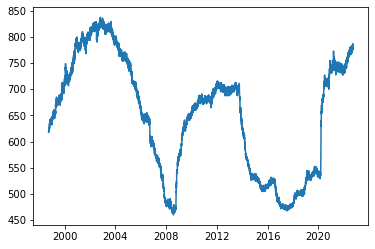

In [187]:
# VaR short portfolio with MC
plt.plot(data_seperate['VaR_portfolio_5years_0.99'])

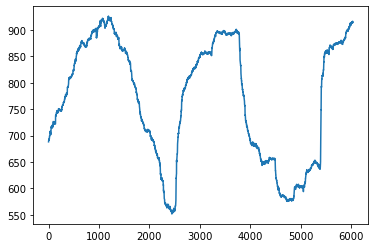

In [188]:
# VaR short portfolio with gbm port
plt.plot(VaR_gbm_short)

In [189]:
# We see that MC simulated VaR is smaller than gbm portfolio generated VaR. MC simulated VaR is noisy but pretty accurate
# compared to MC simulated VaR from last homework.

# 5.)

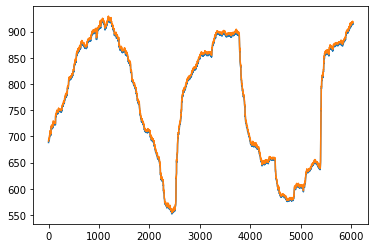

In [203]:
# 99% VaR for GBM short portfolio
plt.plot(VaRgbm_list)

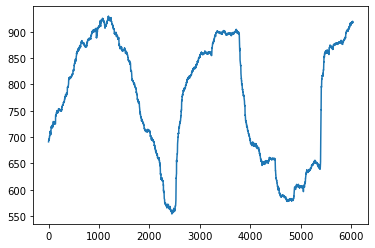

In [204]:
# 0.975 ES for GBM portfolio
plt.plot(ESgbm_list)

In [ ]:
# Both calculations are very close to each other.

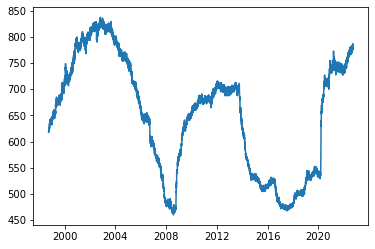

In [207]:
# VaR MC calculation for p = 0.99
plt.plot(data_seperate['VaR_portfolio_5years_0.99'])

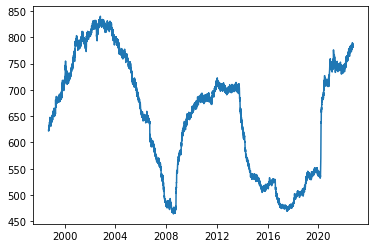

In [206]:
# ES MC calculation for p = 0.975
plt.plot(data_seperate['Es_portfolio_5years_0.975'])

In [ ]:
# Both calculations are very close to each other.

In [241]:
def normalized_variance(s,t,l):
    
    Today = t
    start_date = (Today + relativedelta(years=-1*l))
    trunc_data = s[(s['Dates'] > start_date) & (s['Dates']<= t )]
    length = len(trunc_data)
    
    log_mean = trunc_data.BA_log_return_daily_short.mean()
    sd_log = np.sqrt(1/length*sum(trunc_data.BA_log_return_daily_short**2)-log_mean**2)
    
    sigma_GBM = sd_log/np.sqrt(1/252)
    mu_GBM = log_mean*252+sigma_GBM**2/2
    
    log_mean_2 = trunc_data.NOC_log_return_daily_short.mean()
    sd_log_2 = np.sqrt(1/length*sum(trunc_data.NOC_log_return_daily_short**2)-log_mean_2**2)
    
    sigma_GBM_2 = sd_log_2/np.sqrt(1/252)
    mu_GBM_2 = log_mean*252+sigma_GBM**2/2
    
    ######### my implementation for the actual cov is two inefficient why I approximated it
    # cov var calc
    # cov_list = list()
    # for i in plot_last_l_years (total,5):
        #cov = covariance(trunc_data,i,5)
        #cov_list.append(cov)
    # cor_list = [cov_list[i]*252/(sigma_list_portfolio_5_ba[i]*sigma_list_portfolio_5_noc[i]) 
                #for i in range(len(cov_list))]
    # cor_list[0]
    correlation = trunc_data.BA_log_return_daily_short.corr(trunc_data.NOC_log_return_daily_short)
    
    # gbm calc 
    t = 5/252
    s_ba = (list(trunc_data['PX_LAST_BA']))[0]
    s_noc = (list(trunc_data['PX_LAST_NOC']))[0]
    v0 = 134*s_ba +166*s_noc
    E_134_s_ba = 134*s_ba*np.exp(mu_GBM*t)
    E_166_s_noc = 166*s_noc*np.exp(mu_GBM_2*t)
    E_vt = E_134_s_ba + E_166_s_noc
    E_134square_s_ba_square = 134**2*s_ba**2*np.exp((2*mu_GBM+sigma_GBM**2)*t)
    E_166square_s_noc_square = 166**2*s_noc**2*np.exp((2*mu_GBM_2+sigma_GBM_2**2)*t)
    E_s1_s2 = s_ba*s_noc*np.exp((mu_GBM+mu_GBM_2+sigma_GBM*sigma_GBM_2*correlation)*t)
    E_vt_squared = E_134square_s_ba_square +E_166square_s_noc_square + 2*134*166*E_s1_s2
    var_vt = E_vt_squared - E_vt**2
    
    # var and es calc
    VaR = v0 - (E_vt - 2.326*np.sqrt(var_vt))
    VaR_new = (VaR / v0) * 10000
    
    icdf = norm.ppf(0.975)
    es = v0 + np.sqrt(var_vt)*(norm.pdf(icdf)/(1 - 0.975))
    es_new = (es / v0) * 10000 - 10000
    
    return VaR_new,es_new

In [242]:
var_list_5 = list()
es_list_5 = list()
for i in plot_last_l_years(total,5):
    var_vt,es = normalized_variance(total,i,5)
    var_list_5.append(var_vt)
    es_list_5.append(es)

array([[<AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>,
        <AxesSubplot:xlabel='Time'>],
       [<AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>,
        <AxesSubplot:xlabel='Time'>]], dtype=object)

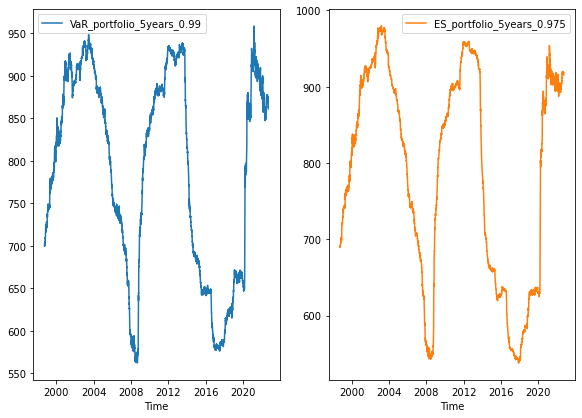

In [243]:
data_portfolio = {'Time':plot_last_l_years (total,2),
                  'VaR_portfolio_5years_0.99': var_list_5,'ES_portfolio_5years_0.975':es_list_5}
data_portfolio = pd.DataFrame(data_portfolio)
data_portfolio.index = data_portfolio['Time']
data_portfolio = data_portfolio.sort_index()
data_portfolio.plot(subplots=True,layout=(2,3),figsize=(15,15))

In [ ]:
# The ES calculation for normalized short portfolio and assumption that BA and NOC follow GBM, seems more smooth 
# and bigger than VaR calculation. Compared to the calculations above, VaR and ES does not seem exactly the same.